# Lab Notebook 7 - SVM

Today we will be learning how to use a Support Vector Machine (SVM) algorithm! Please refer to Chapter 4 of the textbook for details on this ML method.

# SVM from sklearn

## Step 1

Import the modules you will need (numpy, pandas, etc). We are using the following test data set. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn import svm

plt.rc('font', size=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=18)
plt.rc('figure',figsize=(8,6))

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)

print("The first column of X1 are the horizontal coordinates, and the second column are the vertical coordinates.")
print("\nFirst 5 elements of X1:")
print(X1[:5])
print("\nFirst 5 elements of y1:")
print(y1[:5])

The first column of X1 are the horizontal coordinates, and the second column are the vertical coordinates.

First 5 elements of X1:
[[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]

First 5 elements of y1:
[ 1  1  1  1 -1]


Visualize it in a plot with appropriate labels.

Text(0, 0.5, 'Vertical Coordinate')

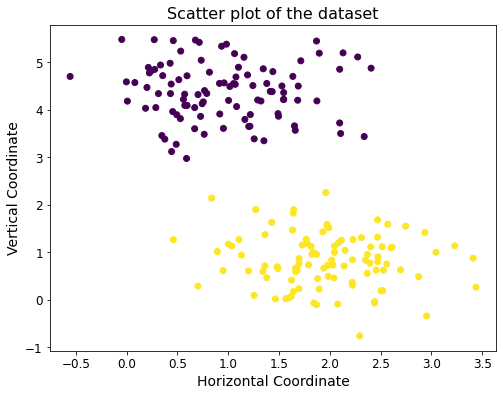

In [3]:
plt.scatter(X1[:,0],X1[:,1],c=y1)

plt.title('Scatter plot of the dataset')
plt.xlabel('Horizontal Coordinate')
plt.ylabel('Vertical Coordinate')

## Step 2

Let's first use svm.SVC(kernel='linear') to define our SVM ML model. Fit the model to the data above using three different values of C: 0.01, 1, and 1e10. Print the w1 and w2 values, as well as the b (intercept) value for each C-value. Display the results in a plot showing the data above and the three decision boundary lines. 

For C=0.01: w1 = 0.16422530882011113, w2 = -0.6326255353764192, b = 1.41018188220038


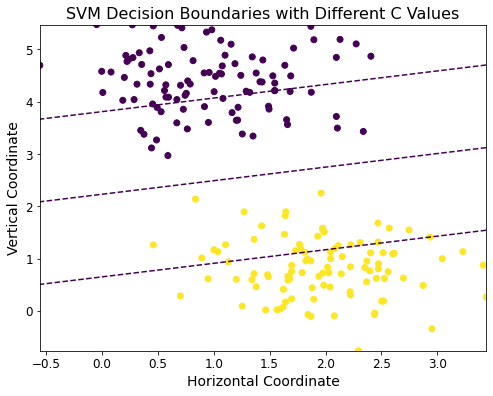

For C=1: w1 = 0.29857719393575743, w2 = -1.7913580128366877, b = 4.448237766851025


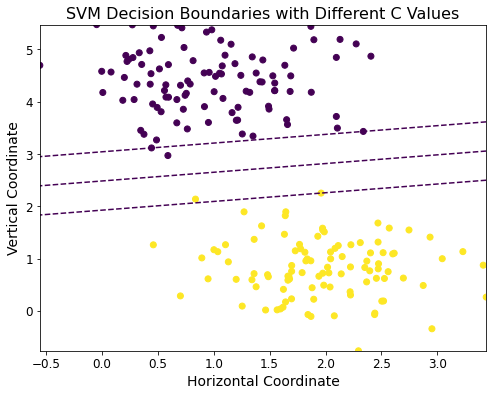

For C=10000000000.0: w1 = 0.5872181442885686, w2 = -2.2259801780430055, b = 5.264291994937055


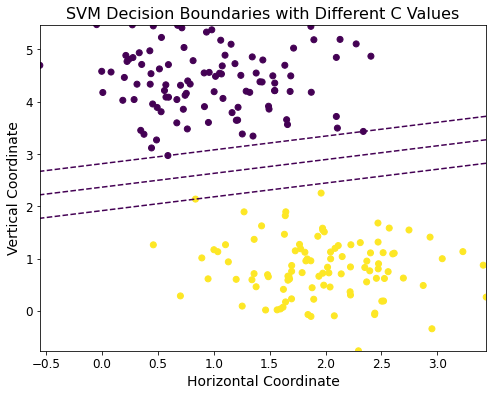

In [9]:
C_vals=[0.01, 1, 1e10]
for C in C_vals:
    model=svm.SVC(kernel='linear',C=C)
    model.fit(X1, y1)
    
    w1=model.coef_[0, 0]
    w2=model.coef_[0, 1]
    b=model.intercept_[0]

    print(f'For C={C}: w1 = {w1}, w2 = {w2}, b = {b}')
    
    xx,yy=np.meshgrid(np.linspace(X1[:, 0].min(),X1[:, 0].max(),50),np.linspace(X1[:,1].min(),X1[:,1].max(),50))
    Z=model.decision_function(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    
    plt.contour(xx,yy,Z,levels=[0],linestyles='dashed')
    plt.contour(xx,yy,Z,levels=[1],linestyles='dashed')
    plt.contour(xx,yy,Z,levels=[-1],linestyles='dashed')
    plt.scatter(X1[:,0],X1[:,1],c=y1)
    plt.title('SVM Decision Boundaries with Different C Values')
    plt.xlabel('Horizontal Coordinate')
    plt.ylabel('Vertical Coordinate')
    plt.show()

## Step 3

Check wether the sklearn solution for w1, w2, and b for the three C-values chosen above indeed satisfies the following inequality (eqn 4.5 from the textbook) for all data points: 

y^i(wx+b)>=1, where w = [w1 w2] and x = [x1 x2]

For those data points that violate the inequality, print them out or, if you have time, show them in the plot you made above with different colours. Also print out by how much these data points violate the conditon. Do the trends make sense to you?

For C=0.01: w1 = 0.16422530882011113, w2 = -0.6326255353764192, b = 1.41018188220038
Points violating the inequality for C = 0.01:
[[0.44359863 3.11530945]
 [1.2021254  3.64414685]
 [2.1139025  1.24743587]
 [0.49422428 3.89005746]
 [0.45976418 1.26145537]
 [1.64003761 1.81948989]
 [1.76747403 1.26987864]
 [0.83685684 2.13635938]
 [1.25566754 3.38204112]
 [0.95270039 3.60293123]
 [0.669787   3.59540802]
 [0.76387373 3.47881655]
 [2.08496451 1.19396573]
 [1.4281155  1.62435083]
 [1.68353782 4.19583243]
 [0.89349964 1.01093082]
 [1.97504659 1.54430994]
 [1.96066731 2.25169776]
 [1.27135141 1.89254207]
 [0.48838231 3.26801777]
 [1.64486098 1.89339414]
 [1.77710994 1.18655254]
 [1.21767506 3.89290127]
 [0.37614087 3.37692467]
 [1.65991049 3.56289184]
 [1.9736977  1.57979848]
 [1.93112532 1.42577101]
 [1.08272576 4.06271877]
 [1.1641107  3.79132988]
 [2.74666646 1.54543482]
 [2.31102276 1.30380848]
 [1.63244736 1.46362009]
 [1.03640403 1.13003195]
 [1.54462126 4.21078127]
 [1.49036845 3.9131

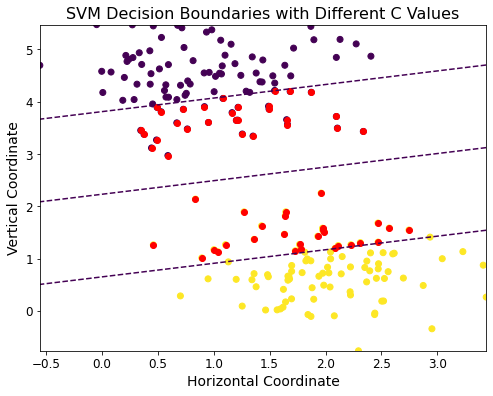

For C=1: w1 = 0.29857719393575743, w2 = -1.7913580128366877, b = 4.448237766851025
Points violating the inequality for C = 1:
[[0.44359863 3.11530945]
 [0.83685684 2.13635938]
 [0.59009904 2.96974544]]
Violation magnitude:
[5.16615420e-05 1.28880354e-01 3.04550598e-01]


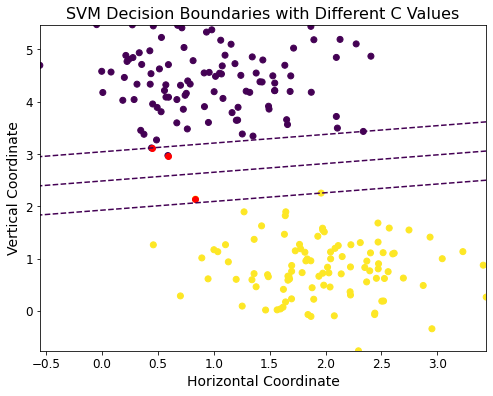

For C=10000000000.0: w1 = 0.5872181442885686, w2 = -2.2259801780430055, b = 5.264291994937055
Points violating the inequality for C = 10000000000.0:
[[0.59009904 2.96974544]]
Violation magnitude:
[0.00021438]


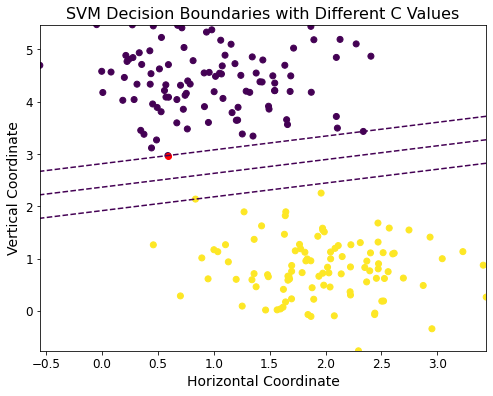

In [14]:
C_vals=[0.01, 1, 1e10]
for C in C_vals:
    model=svm.SVC(kernel='linear',C=C)
    model.fit(X1, y1)
    
    w1=model.coef_[0, 0]
    w2=model.coef_[0, 1]
    b=model.intercept_[0]

    print(f'For C={C}: w1 = {w1}, w2 = {w2}, b = {b}')
    
    xx,yy=np.meshgrid(np.linspace(X1[:, 0].min(),X1[:, 0].max(),50),np.linspace(X1[:,1].min(),X1[:,1].max(),50))
    Z=model.decision_function(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    
    decision_vals=y1*(np.dot(X1,[w1,w2])+b)
    violated_pts=X1[decision_vals < 1]
    violation_mag=1-decision_vals[decision_vals<1]

    if len(violated_pts) > 0:
        print(f'Points violating the inequality for C = {C}:\n{violated_pts}')
        print(f'Violation magnitude:\n{violation_mag}')
        plt.scatter(violated_pts[:,0],violated_pts[:,1],label='Violated Points',c='r',zorder=1)    

    plt.contour(xx,yy,Z,levels=[0],linestyles='dashed')
    plt.contour(xx,yy,Z,levels=[1],linestyles='dashed')
    plt.contour(xx,yy,Z,levels=[-1],linestyles='dashed')
    plt.scatter(X1[:,0],X1[:,1],c=y1,zorder=0)
    plt.title('SVM Decision Boundaries with Different C Values')
    plt.xlabel('Horizontal Coordinate')
    plt.ylabel('Vertical Coordinate')
    plt.show()

### As C increases you are reducing the regularization, the size of the decision boundary decreases so less points are going to be within it.